# Project Intro
Raw data for this project was obtained from https://data.world/sumitrock/video

### Data Dictionary

The data dictionary included in the data set only showed data types.

The descriptions I added after exploring the dataset and source website (VGChartz).

| Column | Data Type | Description |
|--------|:---------:|-------------|
| name | string | name of the game |
| platform | string | platform  the game was released on (i.e. PS4, XOne, etc.) |
| year_of_release | integer | year the game was released |
| genre | string | genre of the game |
| publisher | string | publisher of the game |
| na_sales | decimal | sales in North America (in millions) |
| eu_sales | decimal | sales in Europe (in millions) |
| jp_sales | decimal | sales in Japan (in millions) |
| other_sales | decimal | sales in the rest of the world (in millions) |
| global_sales | decimal | sales throughout the world (in millions) |
| critic_score | integer | average critic score, out of 100 |
| critic_count | integer | total number of critics who provided a score |
| user_score | string | average user score from VGChartz, out of 10 |
| user_count | integer | total number of users who provided a score |
| developer | string | developer of the game |
| rating | string | rating of the game (i.e. E, E10+, T, M, etc.) |

NOTE: user_score values are decimals, 'tbd', or empty. If 'tbd' is converted to empty/NaN, then the data type could be decimal. If multiplied by 10, then the data type could be integer and comparable to critic_score.

# Initial Setup

In [40]:
import numpy as np
import pandas as pd
import functions as fn

df = pd.read_csv('Video_Games.csv') # reading the initial data and storing in a dataFrame

# below line is removing unused columns. Commented out so that I can show functionality of cleaning function
# df.drop(df.columns[[4,6,7,8,10,11,12,13,14,15]], axis=1, inplace=True)
# the following columns will be kept: Name, Platform, Year_of_Release, Genre, NA_Sales, Global_Sales

### Reducing Large df to df_subsets

In [41]:
df_ps4 = df.loc[df['Platform'] == 'PS4']
df_xone = df.loc[df['Platform'] == 'XOne']
df_ps3 = df.loc[df['Platform'] == 'PS3']
df_x360 = df.loc[df['Platform'] == 'X360']
df_wii = df.loc[df['Platform'] == 'Wii']
df_pc = df.loc[df['Platform'] == 'PC']
df_psp = df.loc[df['Platform'] == 'PSP']
df_ds = df.loc[df['Platform'] == 'DS']
# del df # deleting original dataFrame because it is no longer needed

# Data Cleaning

In [61]:
# Below function checks for empty values. Can output info and be modified for cleaning
# Currently only set up to clean columns with dtype of 'bool' or 'float64'.
fn.try_or(lambda: fn.incomplete_check(df_ps4, clean=True, output=False))
fn.try_or(lambda: fn.incomplete_check(df_xone, clean=True, output=False))

df_ps4.drop(df_ps4.loc[df_ps4['Year_of_Release']==2017].index, inplace=True) # drop 1 row with 2017 game
df_ds.drop(df_ds.loc[df_ds['Year_of_Release']==1985].index, inplace=True) # drop 1 row with 1985 game
df_ds.drop(df_ds.loc[df_ds['Year_of_Release']==2020].index, inplace=True) # drop 1 row with 2020 game

# Data Exploration

In [43]:
print(f"DataFrame df_ps4 has {df_ps4.shape[0]} rows/games and {df_ps4.shape[1]} columns.")
print(f"DataFrame df_xone has {df_xone.shape[0]} rows/games and {df_xone.shape[1]} columns.")

DataFrame df_ps4 has 398 rows/games and 16 columns.
DataFrame df_xone has 253 rows/games and 16 columns.


In [58]:
"""Two Similar Outputs for Data Types in Each Column"""
print(df_ps4.dtypes, "\n") # simple print of dtypes
# below creates a list of lists [[column,dtype],[],[]]
columns_list = [[column, df_ps4[f"{column}"].dtypes] for column in df_ps4.columns]
print(f"<>  The table includes the following [[columns, data_types], ...] ('O'==Object, likely a string):\n{columns_list}.")

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score        object
Critic_Count        object
User_Score          object
User_Count          object
Developer           object
Rating              object
dtype: object 

<>  The table includes the following [[columns, data_types], ...] ('O'==Object, likely a string):
[['Name', dtype('O')], ['Platform', dtype('O')], ['Year_of_Release', dtype('float64')], ['Genre', dtype('O')], ['Publisher', dtype('O')], ['NA_Sales', dtype('float64')], ['EU_Sales', dtype('float64')], ['JP_Sales', dtype('float64')], ['Other_Sales', dtype('float64')], ['Global_Sales', dtype('float64')], ['Critic_Score', dtype('O')], ['Critic_Count', dtype('O')], ['User_Score', dtype('O')], ['User_Count', dtype('O')], ['Developer', dtype('O')], ['Rati

In [45]:
"""Genre Counts for Both Systems"""
genre_count = df_ps4["Genre"].value_counts().reset_index().values.tolist() # Ordered (DESC) count of games in each genre
print(f"<>  PS4 Genre Counts: {genre_count}.")
genre_count = df_xone["Genre"].value_counts().reset_index().values.tolist() # Ordered (DESC) count of games in each genre
print(f"<>  Xbox One Genre Counts: {genre_count}.")

<>  PS4 Genre Counts: [['Action', 145], ['Role-Playing', 53], ['Sports', 47], ['Shooter', 42], ['Adventure', 28], ['Misc', 21], ['Racing', 19], ['Fighting', 18], ['Platform', 12], ['Simulation', 6], ['Strategy', 6], ['Puzzle', 1]].
<>  Xbox One Genre Counts: [['Action', 89], ['Shooter', 39], ['Sports', 38], ['Racing', 21], ['Misc', 19], ['Role-Playing', 14], ['Adventure', 14], ['Fighting', 7], ['Platform', 5], ['Simulation', 4], ['Strategy', 3]].


In [46]:
"""Top 10 best sellers one each system"""
best_sellers = [name for name in df_ps4.nlargest(10,"Global_Sales")["Name"]] # List of strings, top 5 best sellers
print(f"<>  PS4 Best Sellers: {best_sellers}.")
best_sellers = [name for name in df_xone.nlargest(10,"Global_Sales")["Name"]] # List of strings, top 5 best sellers
print(f"<>  Xbox One Best Sellers: {best_sellers}.")

<>  PS4 Best Sellers: ['Call of Duty: Black Ops 3', 'Grand Theft Auto V', 'FIFA 16', 'Star Wars Battlefront (2015)', 'Call of Duty: Advanced Warfare', 'FIFA 17', 'Fallout 4', 'Fallout 4', 'FIFA 15', 'Destiny'].
<>  Xbox One Best Sellers: ['Call of Duty: Black Ops 3', 'Grand Theft Auto V', 'Call of Duty: Advanced Warfare', 'Halo 5: Guardians', 'Fallout 4', 'Star Wars Battlefront (2015)', "Assassin's Creed: Unity", 'Destiny', 'Gears of War: Ultimate Edition', 'FIFA 16'].


In [47]:
"""Total number of games for each system"""
print(df['Platform'].value_counts().reset_index().values.tolist()) # Ordered (DESC)
# Most games for Recent Systems: DS > PS3 > Wii > X360 > PC > PSP > PS4 > XOne

[['PS2', 2188], ['DS', 2164], ['PS3', 1359], ['Wii', 1337], ['X360', 1280], ['PSP', 1216], ['PS', 1214], ['PC', 982], ['GBA', 839], ['XB', 832], ['GC', 564], ['3DS', 530], ['PSV', 436], ['PS4', 399], ['N64', 325], ['XOne', 253], ['SNES', 242], ['SAT', 175], ['WiiU', 148], ['2600', 136], ['GB', 99], ['NES', 98], ['DC', 52], ['GEN', 29], ['NG', 12], ['SCD', 6], ['WS', 6], ['3DO', 3], ['TG16', 2], ['GG', 1], ['PCFX', 1]]


# Data Wrangling

In [48]:
"""Date range by system for games released"""
ps4_yr_min, ps4_yr_max = fn.try_or(lambda: fn.year_range(df_ps4,"Year_of_Release")) # 2013-2017
xone_yr_min, xone_yr_max = fn.try_or(lambda: fn.year_range(df_xone,"Year_of_Release")) # 2013-2016
ps3_yr_min, ps3_yr_max = fn.try_or(lambda: fn.year_range(df_ps3,"Year_of_Release")) # 2006-2016
x360_yr_min, x360_yr_max = fn.try_or(lambda: fn.year_range(df_x360,"Year_of_Release")) # 2005-2016
wii_yr_min, wii_yr_max = fn.try_or(lambda: fn.year_range(df_wii,"Year_of_Release")) # 2006-2016
ds_yr_min, ds_yr_max = fn.try_or(lambda: fn.year_range(df_ds,"Year_of_Release")) #1985-2020 OR 2004-2016
psp_yr_min, psp_yr_max = fn.try_or(lambda: fn.year_range(df_psp,"Year_of_Release")) # 2004-2015
pc_yr_min, pc_yr_max = fn.try_or(lambda: fn.year_range(df_pc,"Year_of_Release")) # 1985-2016
# NOTE: Data Cleaning: PS4 (1 game from 2017), DS (1 game from 2020 & 1 game from 1985), PC (has an advantage based on year range for games released)
year_comparisons = f"<>  Date range by system for games released:\n\
    PS4 'Year_of_Release' range from {ps4_yr_min} to {ps4_yr_max}.\n\
    Xbox One 'Year_of_Release' range from {xone_yr_min} to {xone_yr_max}.\n\
    PS3 'Year_of_Release' range from {ps3_yr_min} to {ps3_yr_max}.\n\
    Xbox 360 'Year_of_Release' range from {x360_yr_min} to {x360_yr_max}.\n\
    Wii 'Year_of_Release' range from {wii_yr_min} to {wii_yr_max}.\n\
    DS 'Year_of_Release' range from {ds_yr_min} to {ds_yr_max}.\n\
    PSP 'Year_of_Release' range from {psp_yr_min} to {psp_yr_max}.\n\
    PC 'Year_of_Release' range from {pc_yr_min} to {pc_yr_max}.\n"
print(year_comparisons)

<>  Date range by system for games released:
    PS4 'Year_of_Release' range from 2013.0 to 2016.0.
    Xbox One 'Year_of_Release' range from 2013.0 to 2016.0.
    PS3 'Year_of_Release' range from 2006.0 to 2016.0.
    Xbox 360 'Year_of_Release' range from 2005.0 to 2016.0.
    Wii 'Year_of_Release' range from 2006.0 to 2016.0.
    DS 'Year_of_Release' range from 2004.0 to 2013.0.
    PSP 'Year_of_Release' range from 2004.0 to 2015.0.
    PC 'Year_of_Release' range from 1985.0 to 2016.0.



In [49]:
"""Genre count by console, most to least"""
ps4_genre_counts = fn.try_or(lambda: fn.counter(df_ps4, "Genre"))
xone_genre_counts = fn.try_or(lambda: fn.counter(df_xone, "Genre"))
ps3_genre_counts = fn.try_or(lambda: fn.counter(df_ps3, "Genre"))
x360_genre_counts = fn.try_or(lambda: fn.counter(df_x360, "Genre"))
wii_genre_counts = fn.try_or(lambda: fn.counter(df_wii, "Genre"))
ds_genre_counts = fn.try_or(lambda: fn.counter(df_ds, "Genre"))
psp_genre_counts = fn.try_or(lambda: fn.counter(df_psp, "Genre"))
pc_genre_counts = fn.try_or(lambda: fn.counter(df_pc, "Genre"))
# NOTE: Xbox One only has 253 games and PS4 has 400 games. All other systems have ~1000 or more games
genre_count_comparisons = f"<>  Genre count by console, most to least:\n\
    PS4 genre counts: {ps4_genre_counts}.\n\
    Xbox One genre counts: {xone_genre_counts}.\n\
    PS3 genre counts: {ps3_genre_counts}.\n\
    Xbox 360 genre counts: {x360_genre_counts}.\n\
    Wii genre counts: {wii_genre_counts}.\n\
    DS genre counts: {ds_genre_counts}.\n\
    PSP genre counts: {psp_genre_counts}.\n\
    PC genre counts: {pc_genre_counts}\n"
print(genre_count_comparisons)

<>  Genre count by console, most to least:
    PS4 genre counts: [['Total_Count', 398], ['Action', 145], ['Role-Playing', 53], ['Sports', 47], ['Shooter', 42], ['Adventure', 28], ['Misc', 21], ['Racing', 19], ['Fighting', 18], ['Platform', 12], ['Simulation', 6], ['Strategy', 6], ['Puzzle', 1]].
    Xbox One genre counts: [['Total_Count', 253], ['Action', 89], ['Shooter', 39], ['Sports', 38], ['Racing', 21], ['Misc', 19], ['Role-Playing', 14], ['Adventure', 14], ['Fighting', 7], ['Platform', 5], ['Simulation', 4], ['Strategy', 3]].
    PS3 genre counts: [['Total_Count', 1359], ['Action', 383], ['Sports', 219], ['Shooter', 164], ['Misc', 128], ['Role-Playing', 122], ['Racing', 95], ['Fighting', 78], ['Adventure', 74], ['Platform', 38], ['Simulation', 31], ['Strategy', 24], ['Puzzle', 3]].
    Xbox 360 genre counts: [['Total_Count', 1280], ['Action', 329], ['Sports', 222], ['Shooter', 206], ['Misc', 127], ['Racing', 105], ['Role-Playing', 75], ['Fighting', 66], ['Adventure', 48], ['Simul

# Data Analysis

In [50]:
"""Prints a list of aggregate data for each df/system"""
ps4_sum, ps4_min, ps4_max, ps4_avg, ps4_med, ps4_mode = fn.try_or(lambda: fn.aggregator(df_ps4, "Global_Sales"))
xone_sum, xone_min, xone_max, xone_avg, xone_med, xone_mode = fn.try_or(lambda: fn.aggregator(df_xone, "Global_Sales"))
ps3_sum, ps3_min, ps3_max, ps3_avg, ps3_med, ps3_mode = fn.try_or(lambda: fn.aggregator(df_ps3, "Global_Sales"))
x360_sum, x360_min, x360_max, x360_avg, x360_med, x360_mode = fn.try_or(lambda: fn.aggregator(df_x360, "Global_Sales"))
wii_sum, wii_min, wii_max, wii_avg, wii_med, wii_mode = fn.try_or(lambda: fn.aggregator(df_wii, "Global_Sales"))
ds_sum, ds_min, ds_max, ds_avg, ds_med, ds_mode = fn.try_or(lambda: fn.aggregator(df_ds, "Global_Sales"))
psp_sum, psp_min, psp_max, psp_avg, psp_med, psp_mode = fn.try_or(lambda: fn.aggregator(df_psp, "Global_Sales"))
pc_sum, pc_min, pc_max, pc_avg, pc_med, pc_mode = fn.try_or(lambda: fn.aggregator(df_pc, "Global_Sales"))
# NOTE  Total Sales for PS4, PC, PSP around $300m; Xbox One total sales at $162m.
#       Total Sales for PS3, Xbox 360, Wii, DS closer ot $900m
aggregate_comparisons = f"<>  Aggregates by system for games sold ($ in millions):\n\
    PS4: Total Sales ${ps4_sum} | Lowest Value ${ps4_min} | Highest Value ${ps4_max} | Average ${ps4_avg} | Median ${ps4_med} | Mode ${ps4_mode.loc[0]}.\n\
    Xbox One: Total Sales ${xone_sum} | Lowest Value ${xone_min} | Highest Value ${xone_max} | Average ${xone_avg} | Median ${xone_med} | Mode ${xone_mode.loc[0]}.\n\
    PS3: Total Sales ${ps3_sum} | Lowest Value ${ps3_min} | Highest Value ${ps3_max} | Average ${ps3_avg} | Median ${ps3_med} | Mode ${ps3_mode.loc[0]}.\n\
    Xbox 360: Total Sales ${x360_sum} | Lowest Value ${x360_min} | Highest Value ${x360_max} | Average ${x360_avg} | Median ${x360_med} | Mode ${x360_mode.loc[0]}.\n\
    Wii: Total Sales ${wii_sum} | Lowest Value ${wii_min} | Highest Value ${wii_max} | Average ${wii_avg} | Median ${wii_med} | Mode ${wii_mode.loc[0]}.\n\
    DS: Total Sales ${ds_sum} | Lowest Value ${ds_min} | Highest Value ${ds_max} | Average ${ds_avg} | Median ${ds_med} | Mode ${ds_mode.loc[0]}.\n\
    PSP: Total Sales ${psp_sum} | Lowest Value ${psp_min} | Highest Value ${psp_max} | Average ${psp_avg} | Median ${psp_med} | Mode ${psp_mode.loc[0]}.\n\
    PC: Total Sales ${pc_sum} | Lowest Value ${pc_min} | Highest Value ${pc_max} | Average ${pc_avg} | Median ${pc_med} | Mode ${pc_mode.loc[0]}.\n"
print(aggregate_comparisons)

<>  Aggregates by system for games sold ($ in millions):
    PS4: Total Sales $324.44 | Lowest Value $0.01 | Highest Value $14.63 | Average $0.815 | Median $0.20500000000000002 | Mode $0.02.
    Xbox One: Total Sales $161.97 | Lowest Value $0.01 | Highest Value $7.39 | Average $0.64 | Median $0.22 | Mode $0.01.
    PS3: Total Sales $962.71 | Lowest Value $0.01 | Highest Value $21.04 | Average $0.708 | Median $0.28 | Mode $0.02.
    Xbox 360: Total Sales $988.36 | Lowest Value $0.01 | Highest Value $21.81 | Average $0.772 | Median $0.28 | Mode $0.02.
    Wii: Total Sales $937.27 | Lowest Value $0.01 | Highest Value $82.53 | Average $0.701 | Median $0.19 | Mode $0.02.
    DS: Total Sales $813.55 | Lowest Value $0.01 | Highest Value $29.8 | Average $0.376 | Median $0.11 | Mode $0.02.
    PSP: Total Sales $298.02 | Lowest Value $0.01 | Highest Value $7.69 | Average $0.245 | Median $0.09 | Mode $0.02.
    PC: Total Sales $263.47 | Lowest Value $0.01 | Highest Value $8.01 | Average $0.268 | 

In [51]:
"""Original version of aggregates, before refactoring into a function for reusability"""
genre_by_count = df_ps4.groupby(["Genre"]).agg({"Genre":"count", "Global_Sales":["sum","mean","median","max","min"]}).round(3).sort_values(by=[("Genre","count")], inplace=False, ascending=False)
print(f"Genre_Sales ordered by count [[genre, games_count, sales_sum, mean, median, max, min], [...]]:\n{genre_by_count.reset_index().values.tolist()}.") # convert DataFrame to list of lists for each genre

"""Similar print to above, but organized by mean instead of total games, per genre"""
genre_by_sales = genre_by_count.sort_values(by=[("Global_Sales","mean")], inplace=False, ascending=False) # mean or median makes the most sense because count varies
# print(f"Genre_Sales ordered by mean sales [[genre, games_count, sales_sum, mean, median, max, min], [...]]:\n{genre_by_sales.reset_index().values.tolist()}.") # convert DataFrame to list of lists for each genre

Genre_Sales ordered by count [[genre, games_count, sales_sum, mean, median, max, min], [...]]:
[['Action', 145, 96.8, 0.668, 0.17, 12.61, 0.01], ['Role-Playing', 53, 36.67, 0.692, 0.19, 7.16, 0.01], ['Sports', 47, 56.23, 1.196, 0.6, 8.57, 0.01], ['Shooter', 42, 89.17, 2.123, 0.92, 14.63, 0.01], ['Adventure', 28, 6.39, 0.228, 0.07, 1.66, 0.01], ['Misc', 21, 8.84, 0.421, 0.09, 4.32, 0.02], ['Racing', 19, 12.16, 0.64, 0.22, 2.43, 0.04], ['Fighting', 18, 8.65, 0.481, 0.17, 2.78, 0.02], ['Platform', 12, 7.7, 0.642, 0.305, 1.91, 0.05], ['Simulation', 6, 1.2, 0.2, 0.205, 0.41, 0.01], ['Strategy', 6, 0.6, 0.1, 0.075, 0.21, 0.04], ['Puzzle', 1, 0.03, 0.03, 0.03, 0.03, 0.03]].


In [52]:
"""Converts genre counts to % of total games"""
ps4_genre_counts_pct = [[list[0],round(list[1]/398*100,2)] for list in ps4_genre_counts]
xone_genre_counts_pct = [[list[0],round(list[1]/253*100,2)] for list in xone_genre_counts]
print(f"<>  PS4 Genre % of Total Games: {ps4_genre_counts_pct}");
print(f"<>  Xbox One Genre % of Total Games: {xone_genre_counts_pct}")

<>  PS4 Genre % of Total Games: [['Total_Count', 100.0], ['Action', 36.43], ['Role-Playing', 13.32], ['Sports', 11.81], ['Shooter', 10.55], ['Adventure', 7.04], ['Misc', 5.28], ['Racing', 4.77], ['Fighting', 4.52], ['Platform', 3.02], ['Simulation', 1.51], ['Strategy', 1.51], ['Puzzle', 0.25]]
<>  Xbox One Genre % of Total Games: [['Total_Count', 100.0], ['Action', 35.18], ['Shooter', 15.42], ['Sports', 15.02], ['Racing', 8.3], ['Misc', 7.51], ['Role-Playing', 5.53], ['Adventure', 5.53], ['Fighting', 2.77], ['Platform', 1.98], ['Simulation', 1.58], ['Strategy', 1.19]]


# Creating Charts

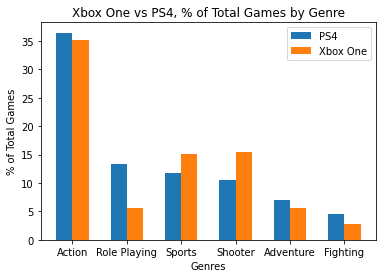

In [53]:
"""Chart showing Xbox One vs PS4, % of Total Games by Genre"""
top_genres = ["Action", "Role Playing", "Sports", "Shooter", "Adventure", "Fighting"] # labels for each set of grouped bars (on x-axis)
PS4 = [36.43,13.32,11.81,10.55,7.04,4.52] # values for 1st bar in each set of grouped bars
Xbox_One = [35.18,5.53,15.02,15.42,5.53,2.77] # values for 2nd bar in each set of grouped bars
fn.try_or(lambda: fn.plotter(top_genres, PS4, Xbox_One, "PS4", "Xbox One", "Genres", "% of Total Games", "Xbox One vs PS4, % of Total Games by Genre"))

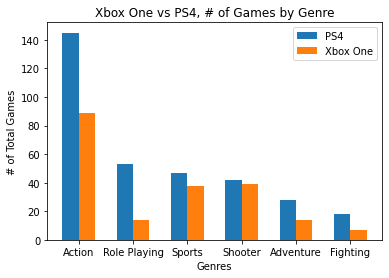

In [54]:
"""Chart showing Xbox One vs PS4, # of Games by Genre"""
PS4 = [145,53,47,42,28,18] # values for 1st bar in each set of grouped bars
Xbox_One = [89,14,38,39,14,7] # values for 2nd bar in each set of grouped bars
fn.try_or(lambda: fn.plotter(top_genres, PS4, Xbox_One, "PS4", "Xbox One", "Genres", "# of Total Games", "Xbox One vs PS4, # of Games by Genre"))

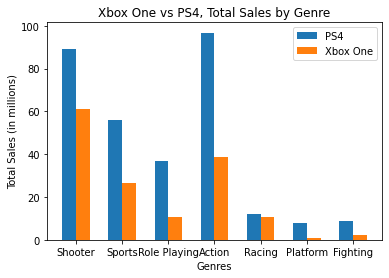

In [55]:
"""Chart showing Xbox One vs PS4, Total Sales by Genre"""
top_genres = ["Shooter", "Sports", "Role Playing", "Action", "Racing", "Platform", "Fighting"] 
PS4 = [89.17,56.23,36.67,96.8,12.16,7.7,8.65] # values for 1st bar in each set of grouped bars
Xbox_One = [61.03,26.77,10.55,38.6,10.43,0.94,2.41] # values for 2nd bar in each set of grouped bars
fn.try_or(lambda: fn.plotter(top_genres, PS4, Xbox_One, "PS4", "Xbox One", "Genres", "Total Sales (in millions)", "Xbox One vs PS4, Total Sales by Genre"))

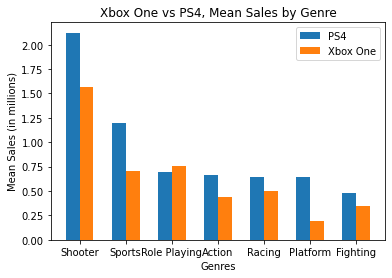

In [56]:
"""Chart showing Xbox One vs PS4, Mean Sales by Genre"""
top_genres = ["Shooter", "Sports", "Role Playing", "Action", "Racing", "Platform", "Fighting"] 
PS4 = [2.123,1.196,0.692,0.668,0.64,0.642,0.481] # values for 1st bar in each set of grouped bars
Xbox_One = [1.565,0.704,0.754,0.434,0.497,0.188,0.344] # values for 2nd bar in each set of grouped bars
fn.try_or(lambda: fn.plotter(top_genres, PS4, Xbox_One, "PS4", "Xbox One", "Genres", "Mean Sales (in millions)", "Xbox One vs PS4, Mean Sales by Genre"))